# Import all the necessary libraries

In [614]:
#Import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Handling, Cleaning and Manipulation

### Loading Data from CSV

In [615]:
# Load the dataset.
# Initialize the DataFrame Object.
file_path="loan.csv"
data = pd.read_csv(file_path)
# The data.info() function shows us that some of the columns have missing values and some have incorrect data types associated with them.
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_36820\417510787.py:4: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


(39717, 111)

In [616]:
# Print summary of Nulls, Blanks in the dataset
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Dropping Columns

In [617]:
# Irrelvant Columns which should be dropped to make the dataset more manageable.
# ==============================================================================
#
# Columns: id, member_d, url
#
# Reason: These are identifiers which are unrelated to business and are just generated by datastore used.
#         They cannot be considered as variables for analysis.
#
data.drop(columns = ['id', 'member_id', 'url'], axis = 1, inplace = True)

# Columns: pymnt_plan, initial_list_status, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code,
#          application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, 
#          tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, 
#          total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, 
#          total_cu_tl, inq_last_12m, acc_open_past_24mths, avg_cur_bal, bc_open_to_buy, bc_util, 
#          chargeoff_within_12_mths, delinq_amnt, mo_sin_old_il_acct, mo_sin_old_rev_tl_op, mo_sin_rcnt_rev_tl_op, 
#          mo_sin_rcnt_tl, mort_acc, mths_since_recent_bc, mths_since_recent_bc_dlq, mths_since_recent_inq, 
#          mths_since_recent_revol_delinq, num_accts_ever_120_pd, num_actv_bc_tl, num_actv_rev_tl, num_bc_sats, 
#          num_bc_tl, num_il_tl, num_op_rev_tl, num_rev_accts, num_rev_tl_bal_gt_0, num_sats, num_tl_120dpd_2m, 
#          num_tl_30dpd, num_tl_90g_dpd_24m, num_tl_op_past_12m, pct_tl_nvr_dlq, percent_bc_gt_75, tax_liens, 
#          tot_hi_cred_lim, total_bal_ex_mort, total_bc_limit, total_il_high_credit_limit
#
# Reason: There is only one/invalid value for all rows and cannot be considered as variable.
#
columns = ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit']
data.drop(columns = columns, axis = 1, inplace = True)

# Columns: title
#
# Reason: This are no standardised values so cannot be grouped/aggegated.
#
data.drop(columns = ['title'], axis = 1, inplace = True)

# Columns: recoveries, collection_recovery_fee
#
# Reason: These are system related fields.
#
data.drop(columns = ['recoveries', 'collection_recovery_fee'], axis = 1, inplace = True)

# Columns: emp_title
#
# Reason: This has different set of values for the same title. E.g. "7 Eleven", "7-eleven", etc.
#         These values can be corrected and standardized, but the insights gained will be at particular
#         Customer level, and might not be that useful. So it can be dropped.
#
data.drop(columns = ['emp_title'], axis = 1, inplace = True)
# NOTE: We will keep 'desc' column and convert it into boolean (desc provided or not) and derive insights.

# Columns: funded_amnt, funded_amnt_inv
#
# Reason: They have almost similar data as loan_amnt
#data.drop(columns = ['funded_amnt_inv'], axis = 1, inplace = True)

# Columns: total_pymnt_inv, total_rec_prncp
#
# Reason: They have almost similar data as total_pymnt
data.drop(columns = ['total_pymnt_inv', 'total_rec_prncp'], axis = 1, inplace = True)

# Columns: delinq_2yrs, out_prncp, out_prncp_inv, total_pymnt
#
# Reason: These columns show data only after the charge off has already happened. So they won't generate
#         any useful insight in determining defaulters.
data.drop(columns = ['delinq_2yrs', 'out_prncp', 'out_prncp_inv'], axis = 1, inplace = True)

# Columns: next_pymnt_d, revol_bal, total_pymnt, total_rec_int
#          last_pymnt_d, last_pymnt_amnt, last_credit_pull_d
#
# Reason: These columns are not directly related to determining a default.
data.drop(columns = ['next_pymnt_d', 'revol_bal', 'total_pymnt', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'], axis = 1, inplace = True)
# NOTE: We will keep 'total_rec_late_fee' and convert it into a boolean (late payments done/not done) and compare
#       whether late payers charge off and derive other insights from it.

# print remaining columns
#
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               39717 non-null  int64  
 1   funded_amnt             39717 non-null  int64  
 2   funded_amnt_inv         39717 non-null  float64
 3   term                    39717 non-null  object 
 4   int_rate                39717 non-null  object 
 5   installment             39717 non-null  float64
 6   grade                   39717 non-null  object 
 7   sub_grade               39717 non-null  object 
 8   emp_length              38642 non-null  object 
 9   home_ownership          39717 non-null  object 
 10  annual_inc              39717 non-null  float64
 11  verification_status     39717 non-null  object 
 12  issue_d                 39717 non-null  object 
 13  loan_status             39717 non-null  object 
 14  desc                    26775 non-null

In [618]:
100 * data.isnull().mean()

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_length                 2.706650
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
desc                      32.585543
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
mths_since_last_delinq    64.662487
mths_since_last_record    92.985372
open_acc                   0.000000
pub_rec                    0.000000
revol_util                 0.125891
total_acc                  0.000000
total_rec_late_fee         0

In [619]:
# Columns to be removed based on the above condition:
#
columns = ['mths_since_last_delinq', 'mths_since_last_record']
data = data.drop(columns, axis = 1)

### Dropping Rows

In [620]:
prev_rows = len(data)

# The rows where loan_stats=Current are the data where the loan repayment is currently in progress
# The loans which are currently in progress will not contribute to decisions 
# of default or pass as it's difficult to predict the outcome
#
# Dropping the rwos early as, dropping all Currrent rows introduces NA columns which can be easily dropped
data = data[data['loan_status'] != "Current"]


# Print current data statistics after dropping rows with loan_status "CURRENT"
curr_rows = len(data)
print("Before: " + str(data.shape[0]))
print("Number of rows dropped where loan_status = 'Current':", (prev_rows - curr_rows))
print("After: " + str(data.shape[0]))
print("Percentage of rows dropped = ", round((prev_rows - curr_rows)/prev_rows*100,2),"%")

Before: 38577
Number of rows dropped where loan_status = 'Current': 1140
After: 38577
Percentage of rows dropped =  2.87 %


In [621]:
# For categorical/strict interger columns, remove rows with less than 4% missing values.
#
categorical_columns = ['pub_rec_bankruptcies']

for col in categorical_columns:
    data = data.dropna(subset = [col])

In [622]:
# Dropping text/description columns which wont contribute to overall analysis
# These are names of establishment etc which will not contribute to loan pass or failure.
data = data.drop(['desc'],  axis=1)

In [623]:
# Dropping column sub_grade as the current analysis will limit to Grade only
data = data.drop(['sub_grade'],  axis=1)

In [624]:
# Dropping all columns whose all the values are NA.
print("Total columns with values NA: ", len(data.columns[data.isna().all()].tolist()),"\n\n")
print("Columns with all values as NA\n", data.columns[data.isna().all()].tolist())

# Dropping all the columns whose all the records are NaN or Null
data = data.dropna(axis='columns', how="all")

Total columns with values NA:  0 


Columns with all values as NA
 []


In [625]:
# Dropping all columns with all zero values
data = data.loc[:, (data != 0).any(axis=0)]


### Data Conversion

In [626]:
# Convert the columns loan_amnt and funded_amnt as flot64
data = data.astype({'loan_amnt':'float','funded_amnt':'float'})

In [627]:
# Convert the term column into an integer from a string
data['term'] = data['term'].apply(lambda x : int(x[:-7]))

In [628]:
data.to_csv('cleaned_file.csv', index=False)

In [629]:
# Convert int_rate to  float by removing the "%" character
data['int_rate'] = data['int_rate'].apply(lambda x : float(x[:-1]))

### Imputation of Data

In [630]:
# Round off the values of key float fields to 2 decimal place
# all int_rate and dti already limited to 2 edcimal
print("Rounding columns to 2 decimal places")
for c in ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'dti']:
    print(c)
    data[c] = data[c].apply(lambda x: round(x,2))

Rounding columns to 2 decimal places
loan_amnt
funded_amnt
funded_amnt_inv
int_rate
dti


In [631]:
# Converting the loan_status to boolean column. "Fully-Paid is True and Charged Off is False"
# Added a function instead of lambda because, if this is accidentally re-run on a boolean column, the logic broke
# Now it will only convert to boolean if the column is a string and has the two specific values
# def convert_loan_status_to_boolean(x):
#     if x == "Fully Paid":
#         return True
#     elif x == "Charged Off":
#         return False
#     else:
#         return x

# data['loan_status'] = data['loan_status'].apply(lambda x: convert_loan_status_to_boolean(x))

In [632]:
# Converting emp_length to integer values
# Converting emp_length as numerical data to create more effective statistical analysis as compared to nominal values
data['emp_length'] = data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3, 
                                                         '7 years': 7, '4 years': 4, '5 years': 5, 
                                                         '1 year': 1, '6 years': 6, '8 years': 8, 
                                                         '9 years': 9,  '10+ years': 10})

C:\Users\venkatesh.gaddam\AppData\Local\Temp\ipykernel_36820\1438428645.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['emp_length'] = data['emp_length'].replace({'< 1 year': 0, '2 years': 2, '3 years': 3,


In [633]:
# Checking if blanks exist
data['emp_length'].value_counts()

emp_length
10.0    8369
0.0     4341
2.0     4207
3.0     3951
4.0     3297
5.0     3161
1.0     3077
6.0     2136
7.0     1689
8.0     1410
9.0     1209
Name: count, dtype: int64

In [634]:
# Print the current dimensions of the dataframe
rows_before = len(data)

In [635]:
# Drop rows with empty values in this scenario
# Since the percent of rows is very small, dropping the rows instead of imputing them
data = data[data['emp_length'].notna()]
data = data[data['pub_rec_bankruptcies'].notna()]

In [636]:
# Print the dimensions of the dataframe after dropping rows
rows_after = len(data)
print("Number of rows dropped = ,", (rows_before - rows_after))
print("Percentage of rows dropped = ", round((rows_before - rows_after)/rows_before*100,2),"%")
print(data.shape)

Number of rows dropped = , 1033
Percentage of rows dropped =  2.73 %
(36847, 25)


In [637]:
columns = ['total_rec_late_fee', 'revol_util']

for col in columns:
    data[columns] = data[columns].round(2)

### Remove Outliers

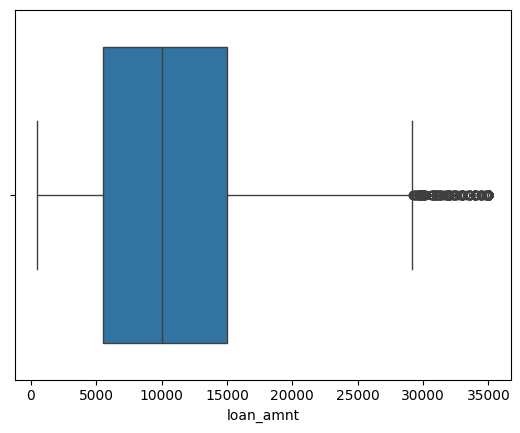

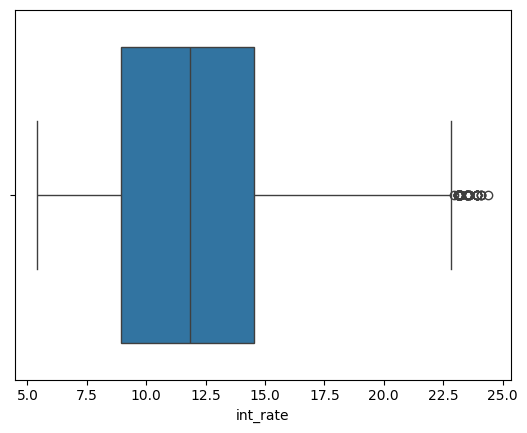

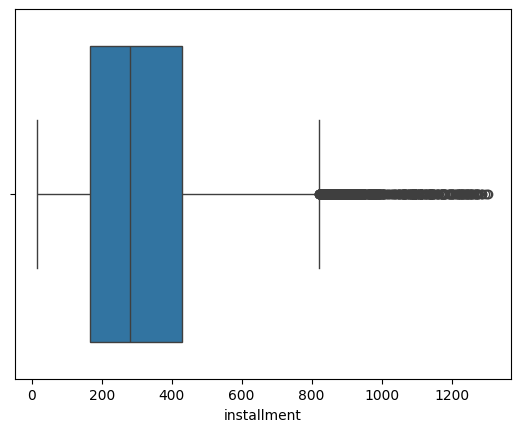

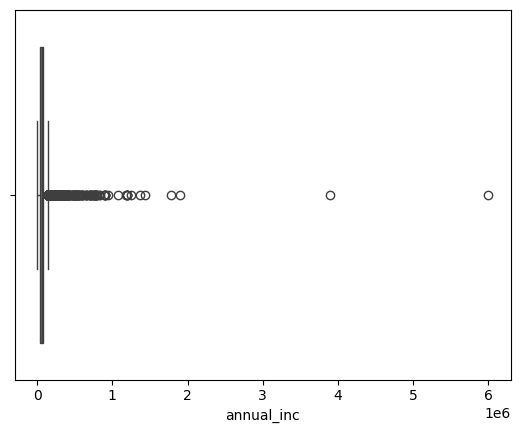

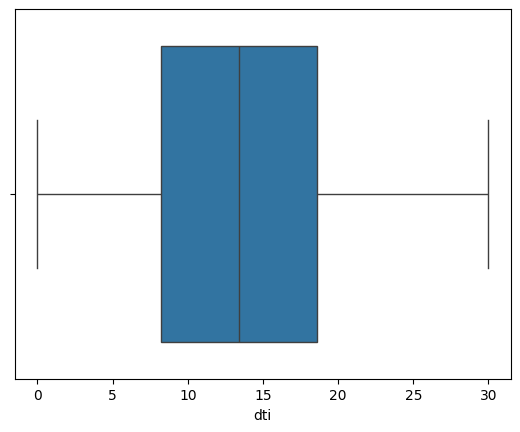

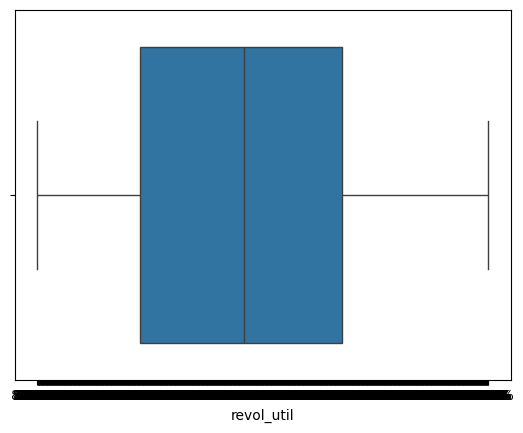

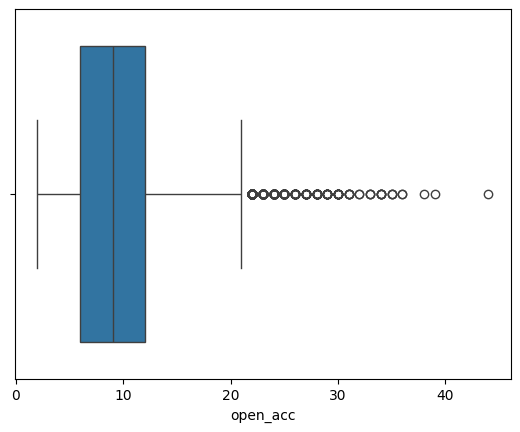

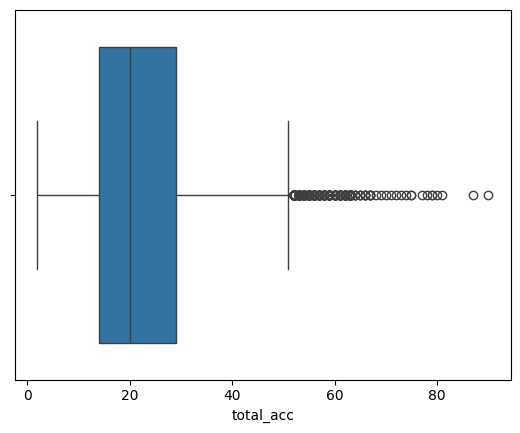

In [638]:
# Check for possible columns with outliers
#
numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc', 'total_acc'
]

for col in numerical_cols:
    sns.boxplot(x = data[col])
    plt.show()

loan_amnt       5500.000
int_rate           8.940
installment      167.565
annual_inc     41004.000
open_acc           6.000
total_acc         14.000
Name: 0.25, dtype: float64
loan_amnt      15000.000
int_rate          14.520
installment      428.975
annual_inc     83000.000
open_acc          12.000
total_acc         29.000
Name: 0.75, dtype: float64
percentage of rows removed: 10.46%


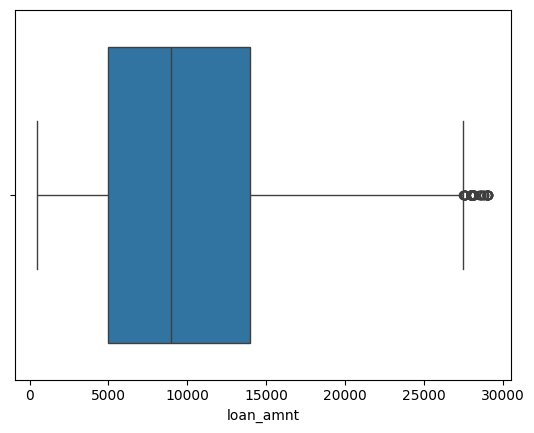

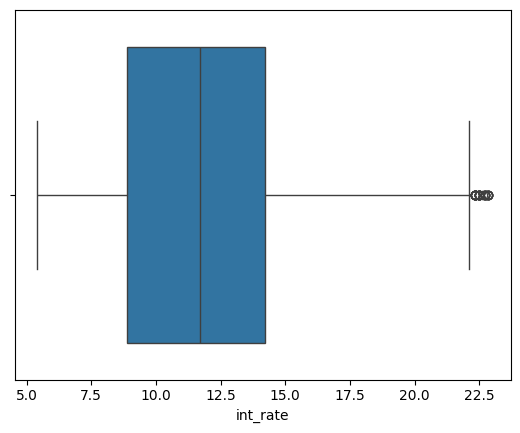

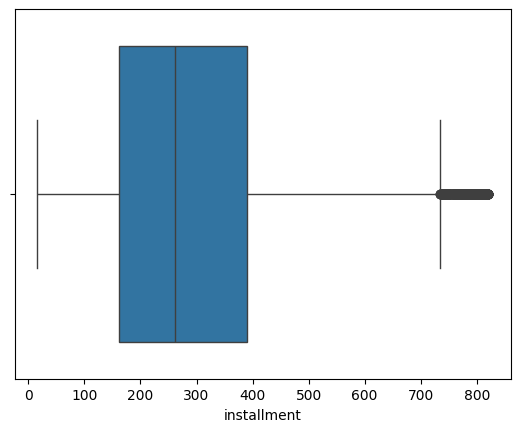

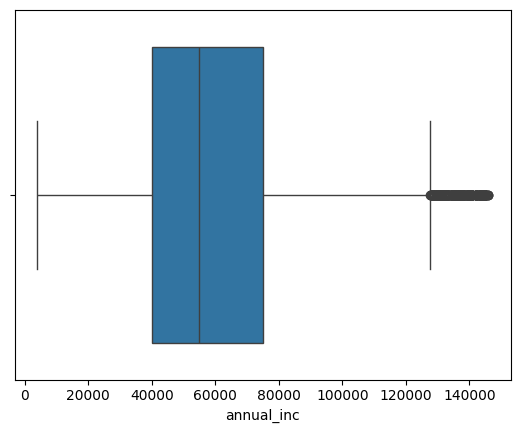

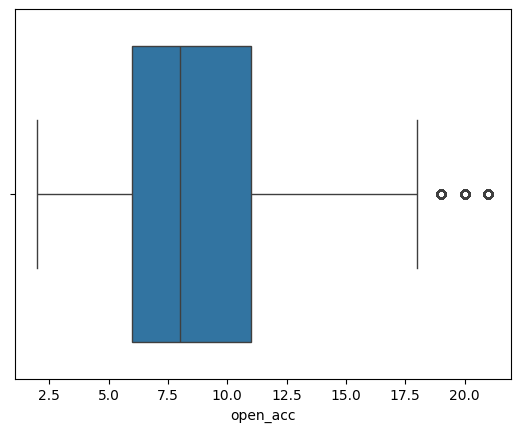

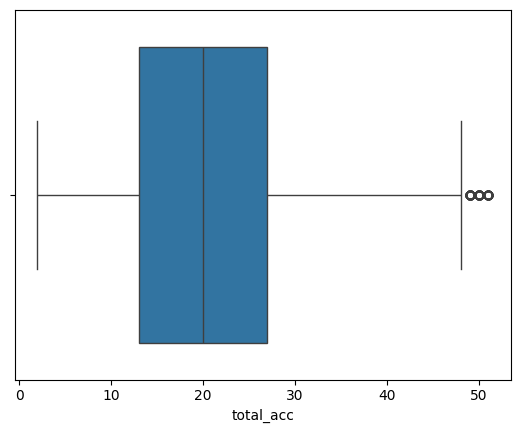

In [639]:
# From the above charts we identify the following columns with squeezed distribution due to outliers.
# Calculate SD 
#Remove values which are away from mean by 2 times SD.

columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 'total_acc']

Q1 = data[columns].quantile(0.25)
Q3 = data[columns].quantile(0.75)
IQR = Q3 - Q1
print(Q1)
print(Q3)

original_len = data.shape[0]
data = data[~((data[columns] < (Q1 - 1.5 * IQR)) |(data[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
new_len = data.shape[0]
percentage = round((original_len - new_len) / original_len * 100, 2)

print("percentage of rows removed: " + str(percentage) + "%")

# Rechecking the plots to see distribution after removal of outliers
#
for col in columns:
    sns.boxplot(x = data[col])
    plt.show()

### Handling Invalid Data

In [640]:
# We will split the date columns as month and year to get more granular insights.
#
columns = ['issue_d', 'earliest_cr_line']

print("Following are the new columns added:")
print("------------------------------------")

for col in columns:
    month_col = str(col) + "_month"
    year_col = str(col) + "_year"

    data[[month_col, year_col]] = data[col].str.split('-', expand = True)
    data[year_col] = data[year_col].apply(lambda x: int(x) + 2000 if int(x) <= 24 else int(x) + 1900)
    
    print(month_col)
    print(year_col)
    
# Drop the original columns
data.drop(columns = columns, axis = 1, inplace = True)

Following are the new columns added:
------------------------------------
issue_d_month
issue_d_year
earliest_cr_line_month
earliest_cr_line_year


In [641]:
# Correcting data types if necessary
data.nunique()

loan_amnt                   786
funded_amnt                 883
funded_amnt_inv            6322
term                          2
int_rate                    324
installment               13134
grade                         7
emp_length                   11
home_ownership                4
annual_inc                 4339
verification_status           3
loan_status                   2
purpose                      14
zip_code                    804
addr_state                   49
dti                        2832
inq_last_6mths                9
open_acc                     20
pub_rec                       5
revol_util                 1080
total_acc                    50
total_rec_late_fee          589
pub_rec_bankruptcies          3
issue_d_month                12
issue_d_year                  5
earliest_cr_line_month       12
earliest_cr_line_year        51
dtype: int64

In [642]:
# Variables with more than 30-40 unique values are counted as numerical.
# Else, categorical.

# Variables where ordering their values does not make sense are Unordered Categorical.
#
unordered_categorical_cols = ['term', 'loan_status', 'addr_state', 'verification_status', 'issue_d_month',
    'home_ownership', 'purpose', 'earliest_cr_line_month', 'desc_given', 'total_rec_late_fee_given'
]

# Variables where ordering their values makes sense are Ordered Categorical.
#
ordered_categorical_cols = ['inq_last_6mths', 'pub_rec', 'pub_rec_bankruptcies', 'grade',  
    'issue_d_year', 'emp_length', 'earliest_cr_line_year'
]

numerical_cols = [
    'loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'open_acc',
    'total_acc'
]

In [643]:
charged_off_df = data[data['loan_status'] == 'Charged Off']
charged_off_df.shape[0]

4682

### Derived Columns

In [644]:
# Bucketting Months to quarters
def get_month_and_quarter(month):
    # Dictionary to map month numbers to month names
    month_dict = {
        1: "Jan", 2: "Feb", 3: "Mar",
        4: "Apr", 5: "May", 6: "Jun",
        7: "Jul", 8: "Aug", 9: "Sep",
        10: "Oct", 11: "Nov", 12: "Dec"
    }
    
    # Determine the month name
    month_name = month_dict.get(month, "Invalid Month")
    
    # Determine the quarter
    if month in [1, 2, 3]:
        return "Q1"
    elif month in [4, 5, 6]:
        return "Q2"
    elif month in [7, 8, 9]:
        return "Q3"
    elif month in [10, 11, 12]:
        return "Q4"
    else:
        return "Invalid Month"

    return f"Month: {month_name}, Quarter: {quarter}"

data['issue_q'] = data.apply(lambda x : get_month_and_quarter(x['issue_d_month']), axis = 1)

In [645]:
data['loan_amnt'].describe()

count    32992.000000
mean      9998.955050
std       6019.255995
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      29100.000000
Name: loan_amnt, dtype: float64

In [646]:
# Bucketting Loan Amount
def bucket_loan_amnt(column):
    if column <= 5000:
        return '0 - 5K'  # 25% quartile
    elif (column >5000) and (column <= 10000):
        return '5K - 10K'      
    elif (column >10000) and (column <= 15000):
        return '10K - 15K'  
    else:
        return '15K - above' # 75% quartile
    
data['loan_amnt_b'] = data.apply(lambda x : bucket_loan_amnt(x['loan_amnt']), axis = 1)

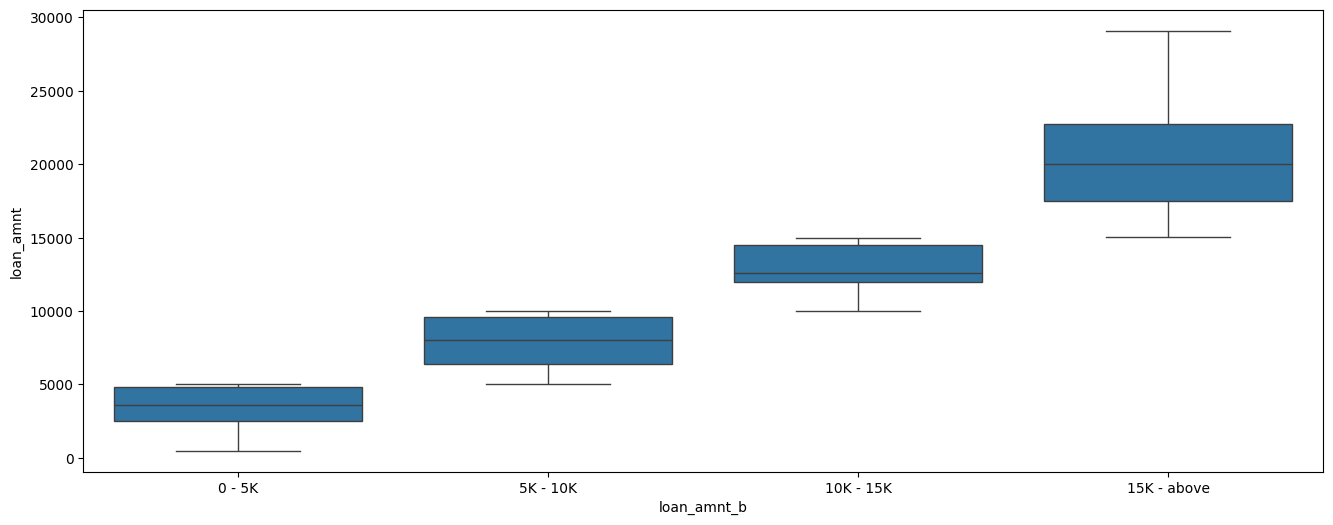

In [647]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=data.loan_amnt,x=data.loan_amnt_b)
plt.show()

In [648]:
data['funded_amnt_inv'].describe()

count    32992.000000
mean      9386.119096
std       5731.449555
min          0.000000
25%       5000.000000
50%       8074.715000
75%      12775.000000
max      29075.000000
Name: funded_amnt_inv, dtype: float64

In [649]:
# Bucketing Annual Income
def bucket_annual_inc(column):
    if column <= 40000:
        return '0 - 40k' # 25% quartile
    elif (column >40000) and (column <= 50000):
        return '40k - 50k'    
    elif (column >50000) and (column <= 60000):
        return '50k to 60k'
    elif (column >60000) and (column <= 70000):
        return '60k to 70k'
    elif (column >70000) and (column <= 80000):
        return '70k to 80k'
    else:
        return '80k - above' # 75% quartile

data['annual_inc_b'] = data.apply(lambda x: bucket_annual_inc(x['annual_inc']), axis = 1)

In [650]:
data['int_rate'].describe()

count    32992.000000
mean        11.773336
std          3.586995
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.850000
Name: int_rate, dtype: float64

In [651]:
# Bucketing interest rate
def bucket_int_rate(column):
    if column <= 9:
        return 'Very Low' # 25% quartile
    elif (column >9) and (column <= 11):
        return 'Low'    
    elif (column >11) and (column <= 13):
        return 'Moderate'
    elif (column >13) and (column <= 15):
        return 'High'
    else:
        return 'Very High' # 75% quartile
    
data['int_rate_b'] = data.apply(lambda x : bucket_int_rate(x.int_rate), axis = 1)

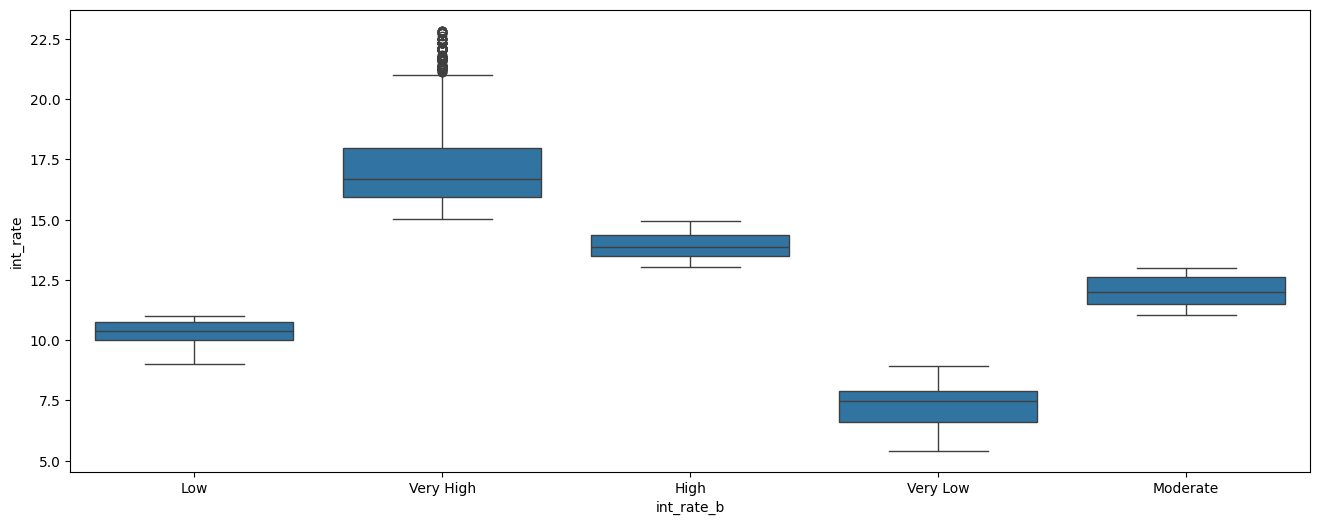

In [652]:
# Validating Categories
plt.figure(figsize=(16,6))
sns.boxplot(y=data.int_rate,x=data.int_rate_b)
plt.show()

### Data Post Cleanup

In [653]:
# Printing column info to analyse missing values, empty values in a column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 32992 entries, 0 to 39680
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               32992 non-null  float64
 1   funded_amnt             32992 non-null  float64
 2   funded_amnt_inv         32992 non-null  float64
 3   term                    32992 non-null  int64  
 4   int_rate                32992 non-null  float64
 5   installment             32992 non-null  float64
 6   grade                   32992 non-null  object 
 7   emp_length              32992 non-null  float64
 8   home_ownership          32992 non-null  object 
 9   annual_inc              32992 non-null  float64
 10  verification_status     32992 non-null  object 
 11  loan_status             32992 non-null  object 
 12  purpose                 32992 non-null  object 
 13  zip_code                32992 non-null  object 
 14  addr_state              32992 non-null  obj

In [654]:
data.shape

(32992, 31)

In [655]:
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc', 'total_rec_late_fee', 'pub_rec_bankruptcies',
       'issue_d_month', 'issue_d_year', 'earliest_cr_line_month',
       'earliest_cr_line_year', 'issue_q', 'loan_amnt_b', 'annual_inc_b',
       'int_rate_b'],
      dtype='object')

## Univeriate Analysis

In [656]:
# Column metadata used by functions below
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income', 
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_d_year': 'Issue Year',
    'issue_d_month': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

### Common Functions


In [657]:
# This function creates a dictionary of outliers which includes the inter quartile range, 
# lower and upper bound for a particular column.
# Formulae used in this analysis
# IQR = 75th Quartile - 25th Quartile
# Lower Bound = 25th Quartile - 1.5 * IQR
# Upper Bound = 75th Quartile + 1.5 * IQR

iqr_multiplier = 1.5

def get_iqr(df, column):
    quar25 = df[column].quantile(0.25)
    quar75 = df[column].quantile(0.75)
    iqr = quar75 - quar25
    lower = quar25 - iqr_multiplier * iqr
    upper = quar75 + iqr_multiplier * iqr
    return {'quartile1': quar25, 'quartile3': quar75, 'iqr': iqr, 'lower_bound': lower, 'upper_bound': upper}


# The function treat outliers, prints a box plot for each column under consideration
# Plot 1 = Before outlier treatment
# Plot 2 = Post outlier treatment
# Also prints statistics of how many rows and percentage of rows dropped
def outlier_comparison(df, column):
    # box plot before dropping outliers
    fig, p = plt.subplots(1,2,figsize=(14, 3))
    splot1 = sns.boxplot(df[column], ax=p[0], orient="h")
    splot1.set_title('Plot ['+ column + '] - Original')
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    # box plot after dropping outliers    
    splot2 = sns.boxplot(new_df[column], ax=p[1])
    splot2.set_title('Plot [' + column + '] - Post Outlier Treatment')
    plt.tight_layout()
    plt.show()
    
def drop_outlier(df, column):
    old_rows = len(df)
    new_df = df[df[column] < get_iqr(df, column)['upper_bound']]
    new_rows = len(new_df)
    print('Rows dropped: ', old_rows - new_rows)
    print('Percentage rows dropped: ', round((old_rows - new_rows)/old_rows*100,2), "%")
    return new_df

def calculate_charged_off_percentage(group):
    total_count = len(group)
    filtered_count = len(group[group['loan_status'] == 'Charged Off'])  # Apply the desired filter
    percentage = filtered_count / total_count * 100
    return percentage

def charged_off_dist_plots(col, figsize = (8, 5), vertical = False):
    # Determine grid
    rows = 1
    cols = 2
    
    if vertical:
        rows = 2
        cols = 1
    
    # Plot univariate distribution
    fig, axes = plt.subplots(rows, cols, figsize = figsize)
    
    # Group by column
    df_grouped = data.groupby(col).size().reset_index(name = 'total')
    charged_off_df_grouped = charged_off_df.groupby(col).size().reset_index(name = 'charged off')

    # Merge two df groups into one
    df_merged = pd.merge(df_grouped, charged_off_df_grouped, on = col, how = 'outer')
    df_merged.fillna({'charged off': 0}, inplace=True)
    #df_merged['charged off'].fillna(0, inplace = True)
    df_merged = df_merged.sort_values(by = 'total')

    # Plot the dataframe
    df_merged.plot(x = col, y = 'total', kind = 'bar', ax = axes[0], colormap = 'Paired')
    df_merged.plot(x = col, y = 'charged off', kind = 'bar', ax = axes[0], stacked = True)
    axes[0].set_title("Count Distribution for " + col)

    # Plot % of distribution in each segment
    grouped = data.groupby(col).apply(calculate_charged_off_percentage,include_groups=False).sort_values()
    grouped.plot(kind = 'bar', ax = axes[1])
    axes[1].set_title("Charged Off % for " + col)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel('Percentage')

    fig.tight_layout()

def univariate_analysis(df, column):
    fig, p = plt.subplots(1,2, figsize=(16, 4))
    sns.histplot(df.loc[df[column].notnull(), column], kde=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles[column])
    p[1].set_xlabel(column_titles[column])
    plt.tight_layout()
    plt.show()


In [658]:
# Bivariate analysis of columns against loan_status and calculate the ratio of Charge Offs
def analysis_vs_loan_status(df, col):
    fig, p = plt.subplts(1,2, figsize=(16, 4))
    splt = sns.countplt(df[col], ax=p[0])
    splt.set_xticklabels(splt.get_xticklabels(), rotation=90);
    p[0].set_title('['+ col + '] - loan_status=all')
    cross_tab = pd.crosstab(df[col], df['loan_status'], normalize='index')
    cross_tab.plt.bar(ax=p[1], stacked=True)
    p[1].set_title('['+ col + '] - Stacked')
    plt.show()


def continious_column_analysis(df, column):
    f, (ax1, ax2) = plt.subplts(nrows=1, ncols=2, figsize=(16,4))
    sns.distplt(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=ax1)
    sns.boxplt(x=column, y='loan_status', data=df, ax=ax2)
    ax1.set_xlabel(column_titles[column])
    ax2.set_xlabel(column_titles[column] + 'by Loan Status')
    plt.tight_layout()
    plt.show()
    # return group by dataframe for display comparison
    return df.groupby('loan_status')[column].describe()

def comparison_loan_status(df, column):
    df.groupby('loan_status')[column].value_counts().unstack().plt(kind='bar', figsize=[16,4])
    plt.show()


def ratio_wise(df, column):
    rw = df.pivot_table(index=column, columns='loan_status', values='id', aggfunc=len).reset_index()
    rw['total'] = rw['Charged Off'] + rw['Fully Paid']
    rw['charge_off_ratio'] = round(rw['Charged Off'] / rw['total'] * 100)
    rw.sort_values(by='total', ascending=False)
    return rw

def ratio_wise_plt(df, column, invert=False):
    plt.figure(figsize=[20,8])
    plt.title('Charged Off : ' + column_titles[column])
    rw = ratio_wise(df, column)
    if invert:
        sns.barplt(x=rw['charge_off_ratio'], y=rw[column],data=df)
    else:
        sns.barplt(x=rw[column],y=rw['charge_off_ratio'],data=df)
    plt.tight_layout()
    plt.show()
    return rw

def series_plt(df, column, hue=None, annot=1):
        temp = pd.Series()
        fig, ax = plt.subplts(figsize=(20,14))
        width = len(df[column].unique()) + 6 + 4 * len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplt(data = df, x=column, order=df[column].value_counts().index, hue=hue) 
        if annot == 1:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+20))  
        elif annot == 2:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
        plt.show()

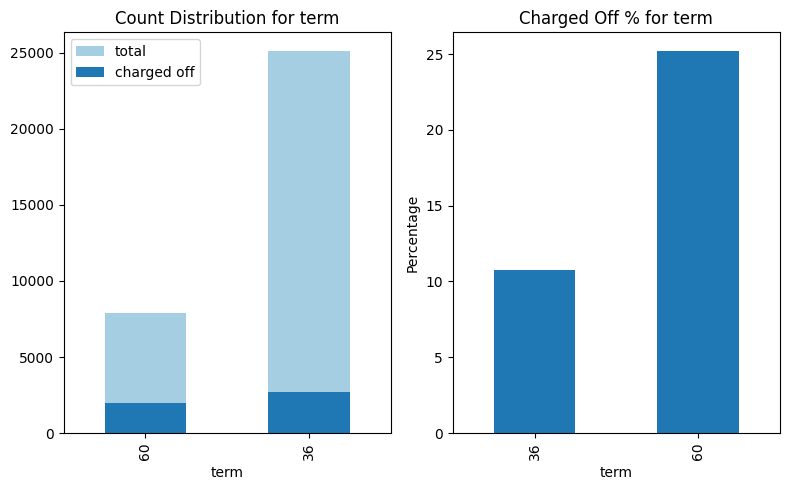

In [659]:
charged_off_dist_plots('term')

### Insights
There are almost thrice more loan takers for the term of 36 months with 15% less defaulters than 60 months term.

**Conclusion:**
- Giving out loan for a term of 36 months seems far more profitable.

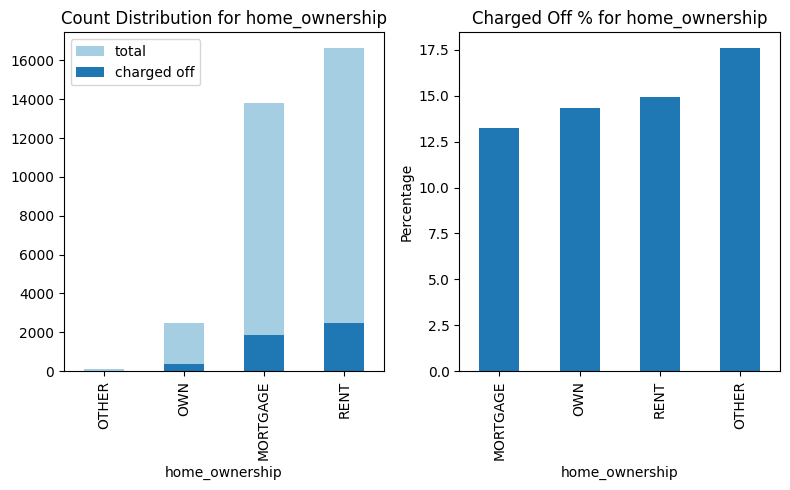

In [660]:
charged_off_dist_plots('home_ownership')

### Insights
Rent and Mortgage give almost similar business but Mortgage has less default percentage. 
Own and Others has very high default rate
while business is very less.

**Conclusion**:
- Mortgage seems profitable
- Avoid Own.
- Reject Loans for Other Category since their defaulting rate is very high.

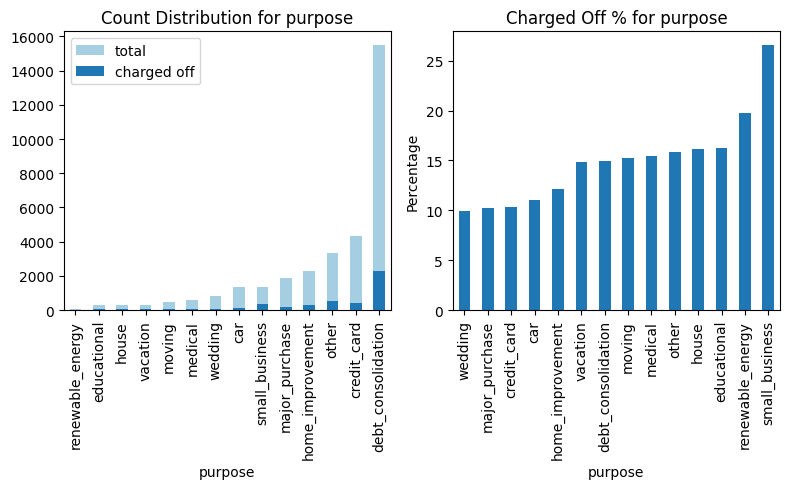

In [661]:
charged_off_dist_plots('purpose')

### Insights
Small business are having high default rate.

**Conclusion**:
- Avoid giving loan to small businesses

In [662]:
# Data Cleaning
# Handling missing values
data = data.dropna(axis=1, how='all')

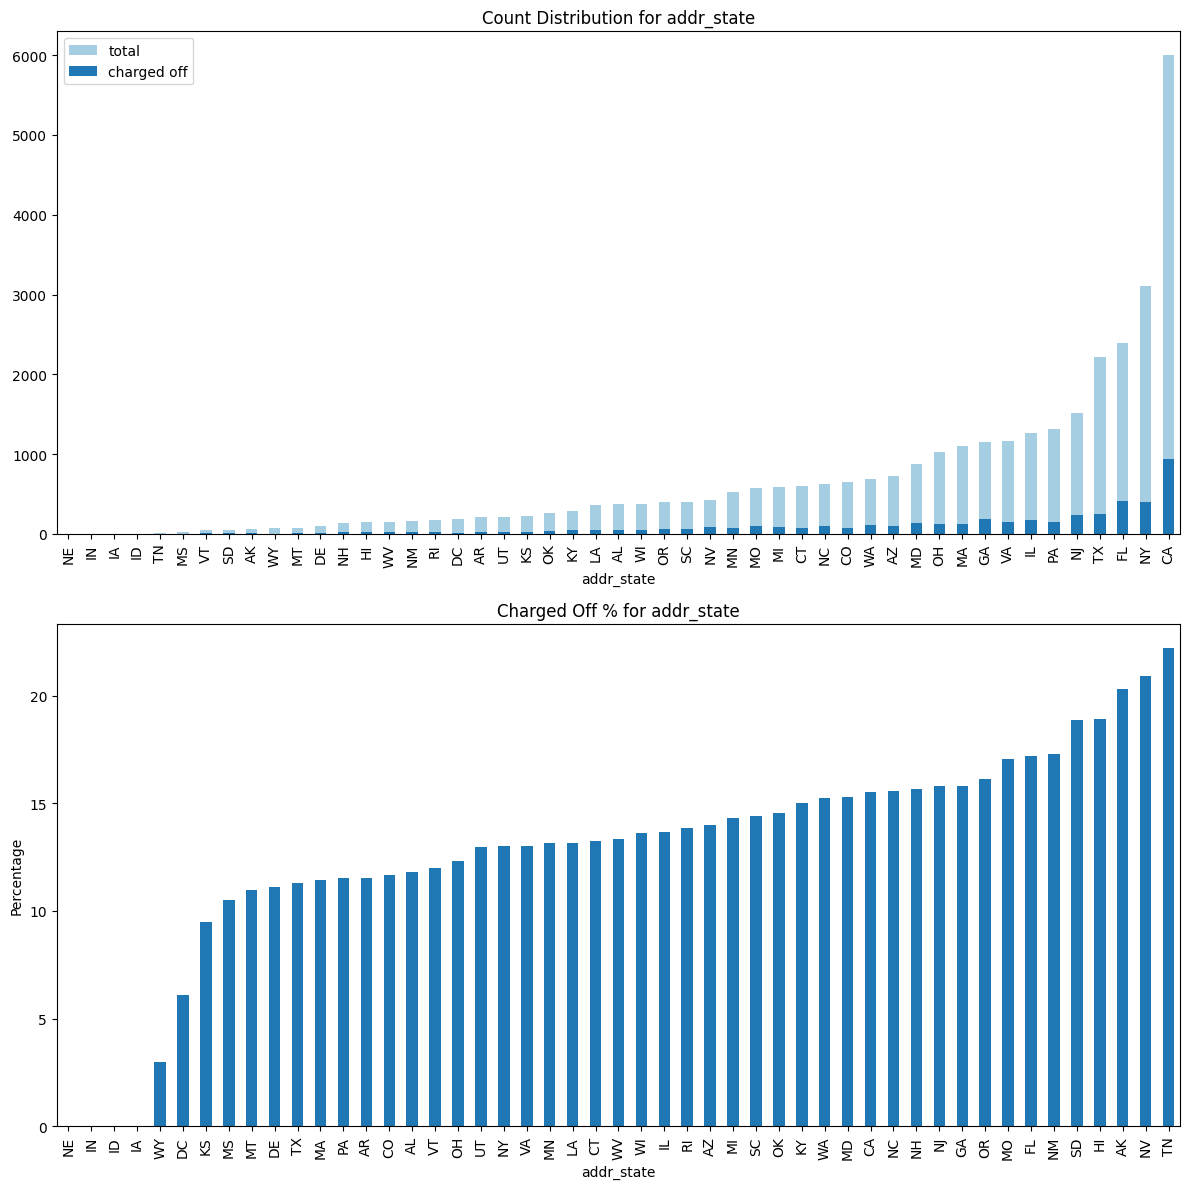

In [663]:
charged_off_dist_plots('addr_state', figsize = (12, 12), vertical = True)

### Insights
Interest rate for NY is less than 15% while CA goes above 15%.

**Conclusion:**
- NY is a better state for profitability than CA.
- AK, NV, SD, TN states should be avoided to issue loans due to very high default rate.

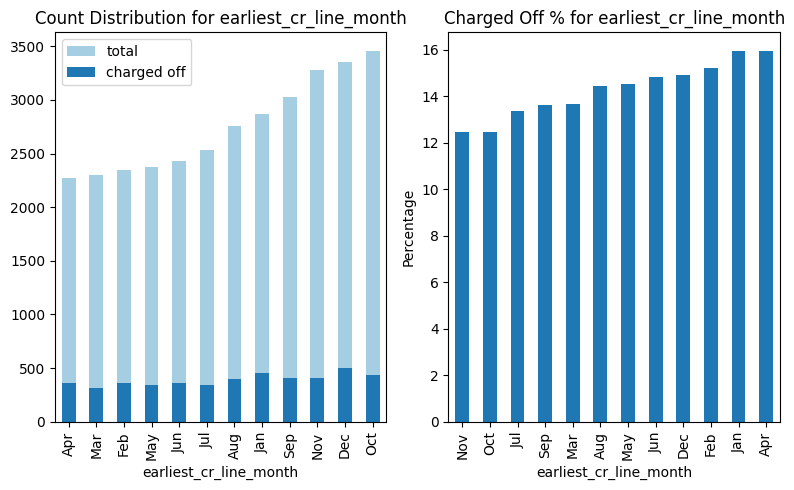

In [664]:
charged_off_dist_plots('earliest_cr_line_month')

### Insights

April has highest default percentage while giving least customers.

**Conclusion:**
- Avoid issueance where earliest credit line is in April

### Ordered Categorical Variable

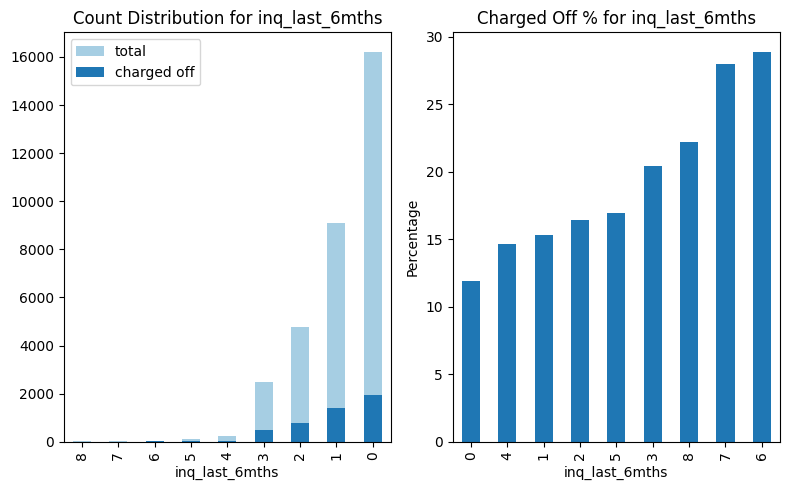

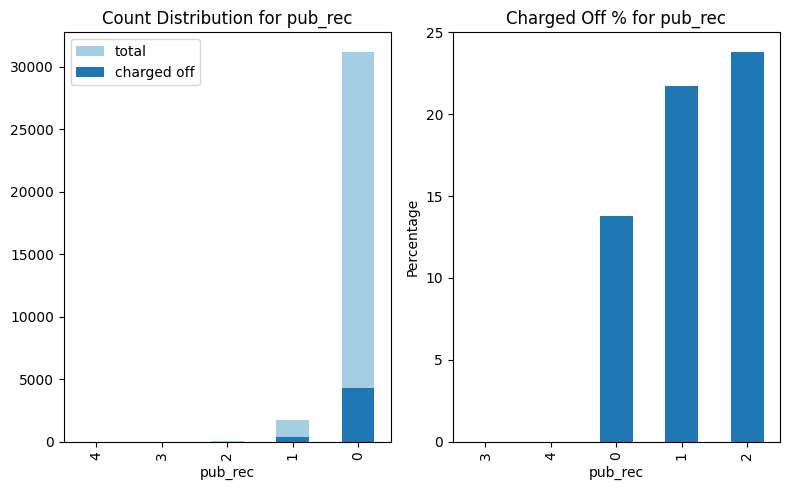

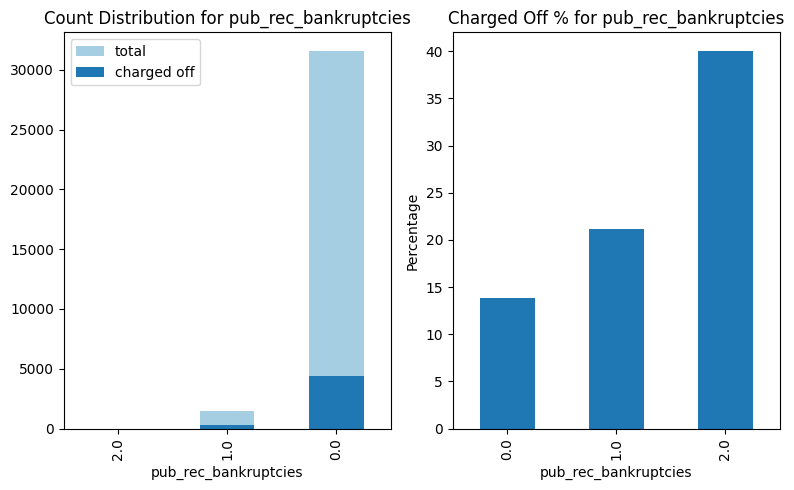

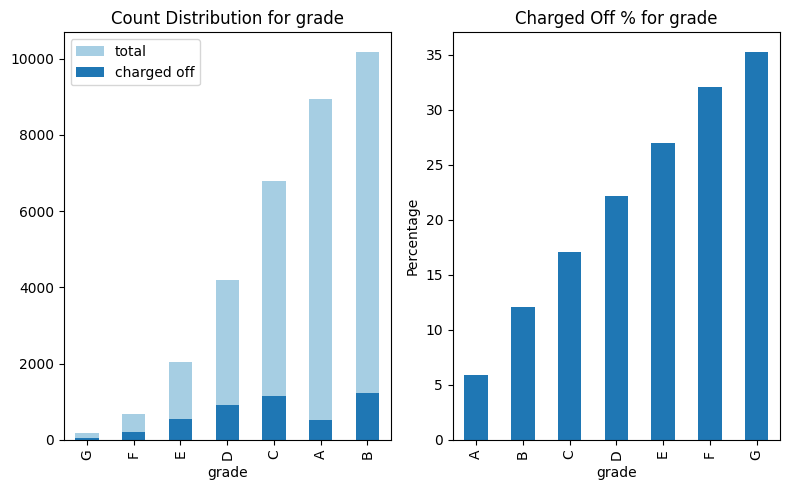

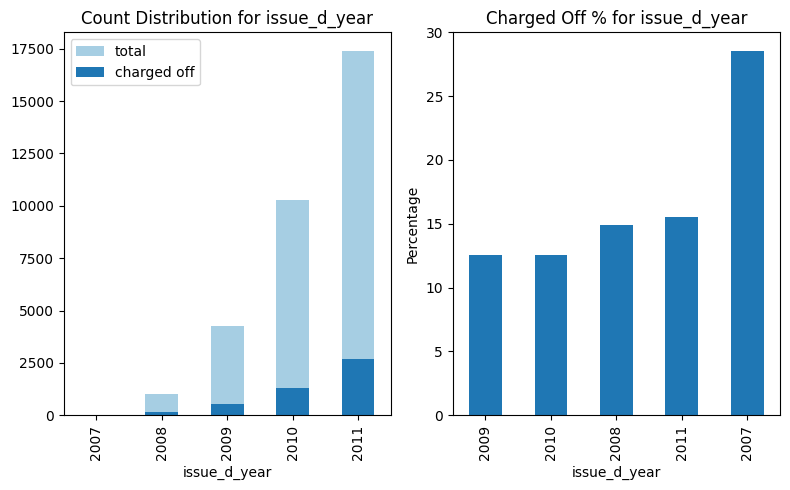

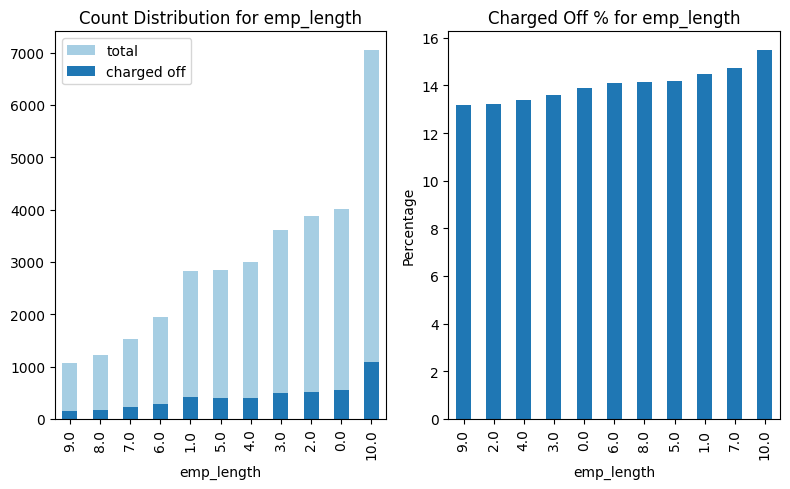

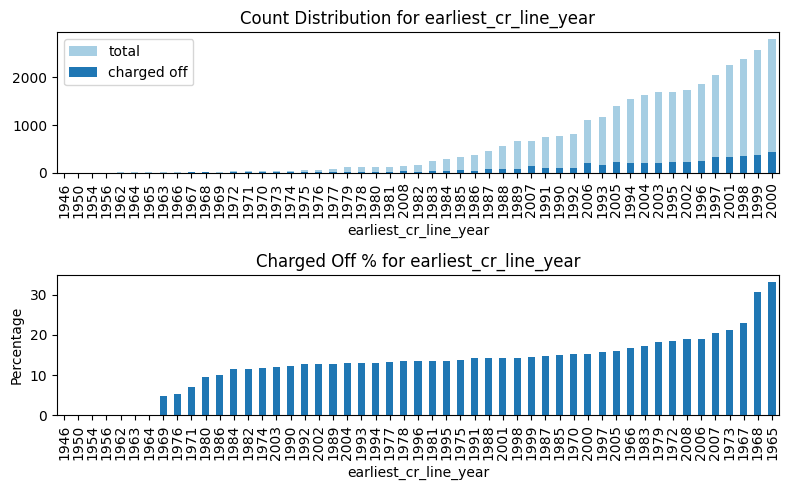

In [665]:
for col in ordered_categorical_cols:
    if col == 'sub_grade' or col == 'earliest_cr_line_year':
        charged_off_dist_plots(col, vertical = True)
    else:
        charged_off_dist_plots(col)

### Insights

**Column: Inquiries in past 6 months**
- There are large number of loan takers for which least number of inquiries are made.
- Percentage of defaulters is high for higher number of inquiries.

**Conclusion:**
- Very less number of defaulters where none or only one inquiry is made.

**Column: Public records and Bankruptcies**
- Almost 25% default rate where there is atleast 1 public record or recorded bankruptcies.

**Conclusion:**
- Issue loans only to those with no public records or bankruptcies.

**Column: Loan Grade**
- As grade of loan increases, percentage of defaulters go higher.

**Conclusion:**
- Do not issue loans of D E F G categories, they have over 20% default rate.

**Column: Issue Year**
- Highest default rate in 2007

**Conclusion:**
- This would be due to the Global financial crises.

**Column: Employement Length**
- Highest default rate with length of 4 years.

**Conclusion:**
- This would be due to high expenses in other factors in life such as marriage, house buying, car etc.

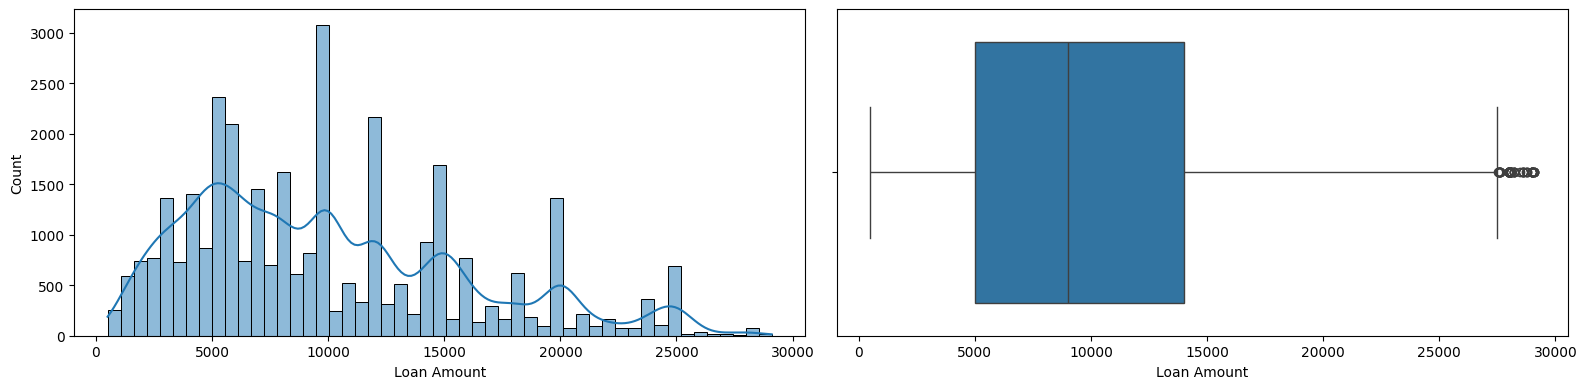

In [666]:
univariate_analysis(data, 'loan_amnt')

## Insights

**Majority of the loan_amount is in the range of 5K to 14K**



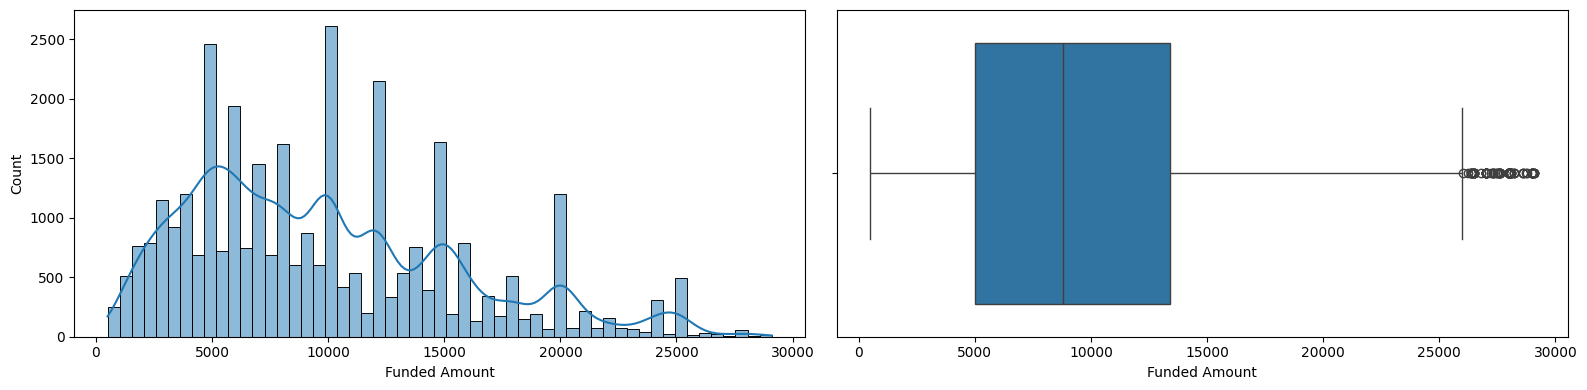

In [667]:
univariate_analysis(data, 'funded_amnt')

## Insights

**Majority of the fund_amount is in the range of 5K to 14K**



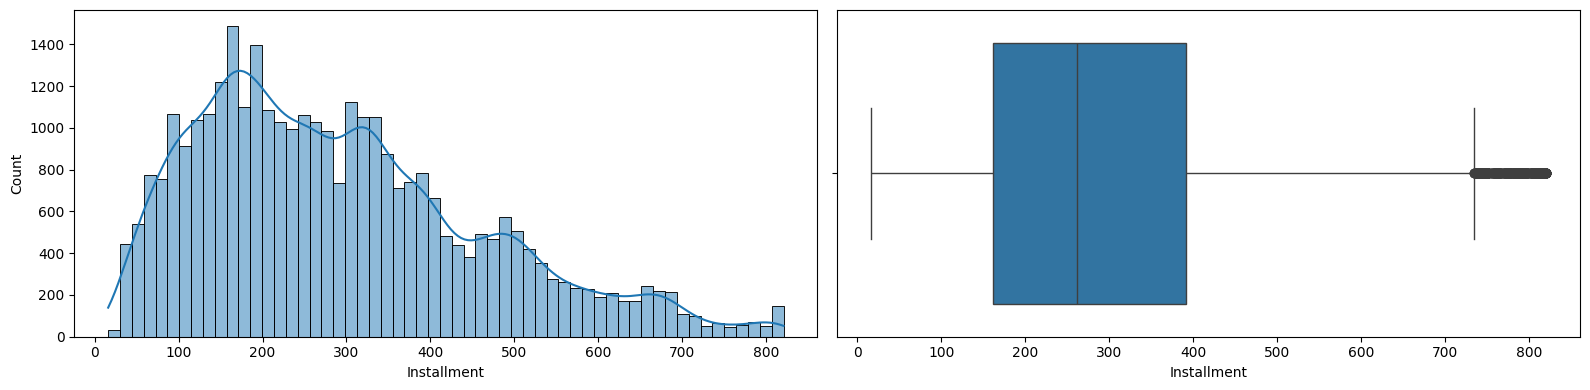

In [668]:
univariate_analysis(data, 'installment')

## Insights

**Majority of the installments are in the range of 20 to 400**

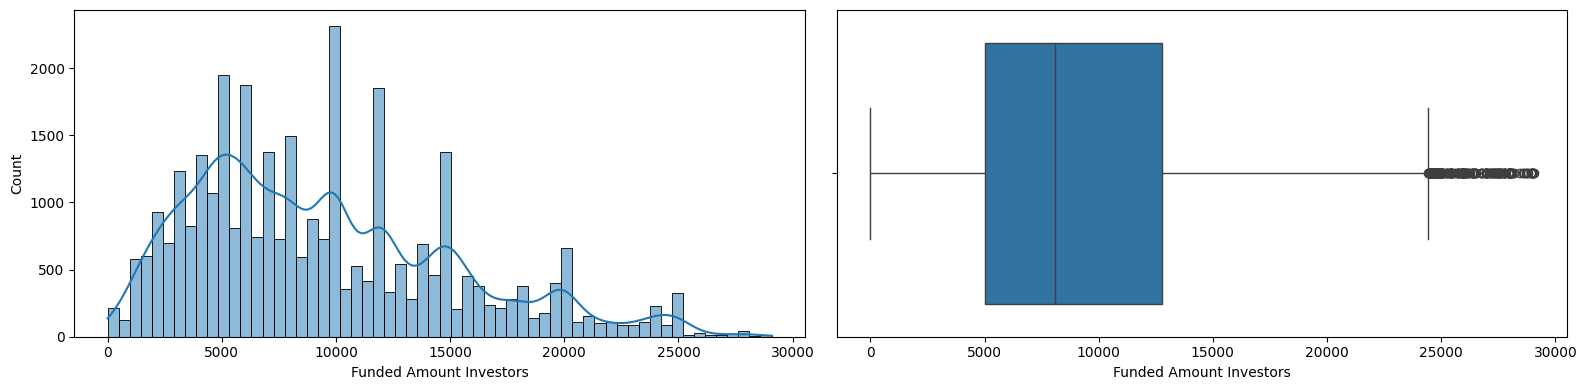

In [669]:
univariate_analysis(data, 'funded_amnt_inv')

## Insights

**Majority of the fund_amount is in the range of 5K to 12K**



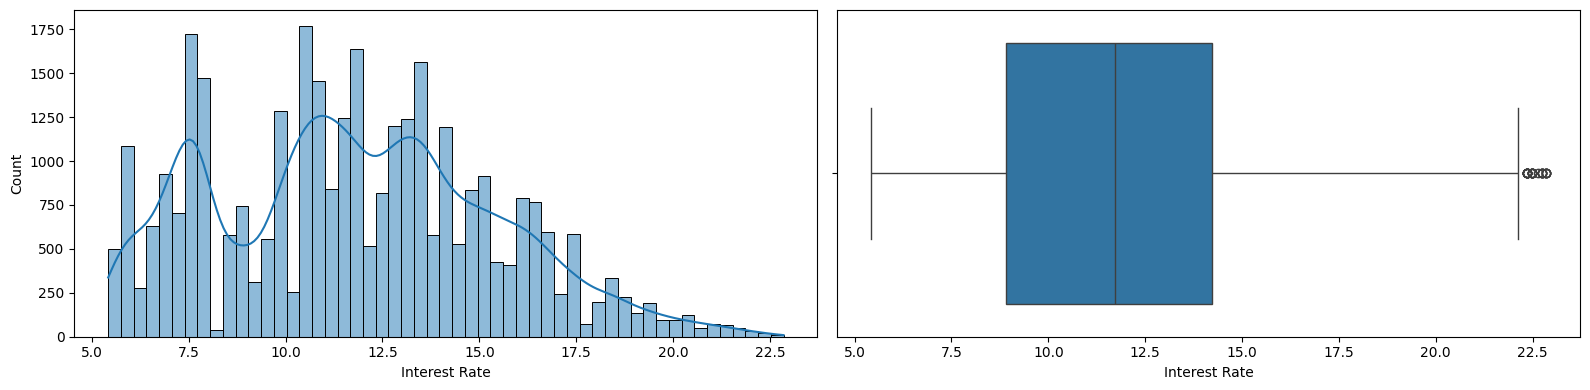

In [670]:
univariate_analysis(data, 'int_rate')

## Insights

**Majority of the interest rate is  5-15%**

**Max interest rate is 22.5%**



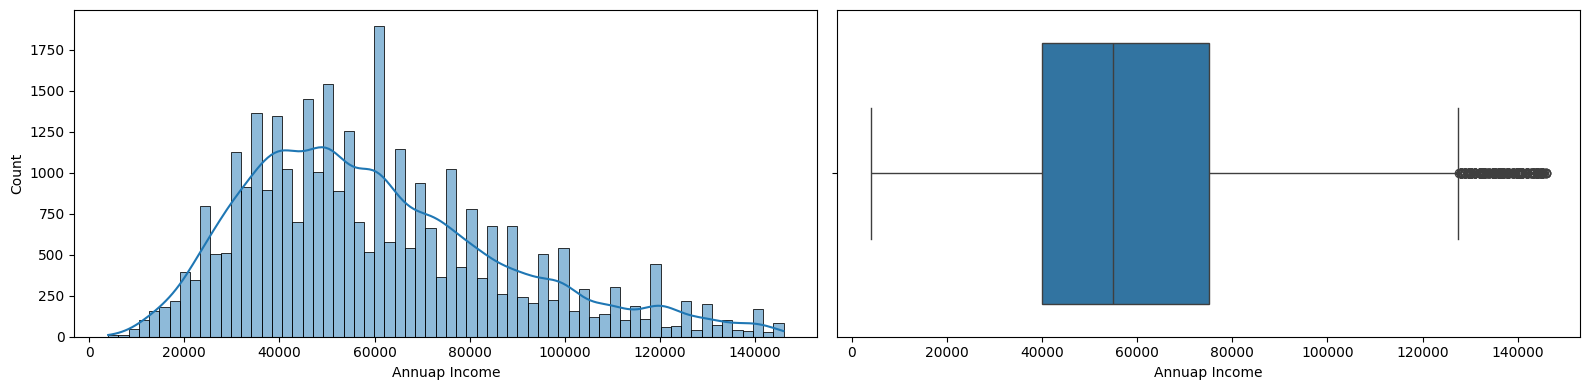

In [671]:
univariate_analysis(data, 'annual_inc')

## Insights

**Majority of the income is in  4K & 60K**

**Max Annual income is 145000**



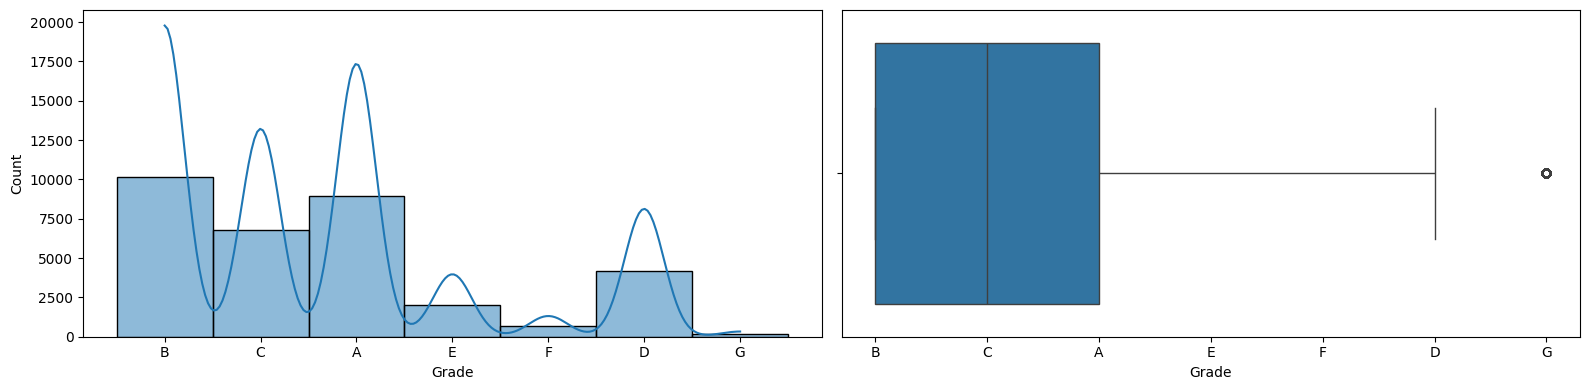

In [672]:
univariate_analysis(data,'grade')

## Insights

**Majority of the Loan applications fall under Grade-B**

## Unordered Categorical Variable Analysis

<Axes: xlabel='home_ownership'>

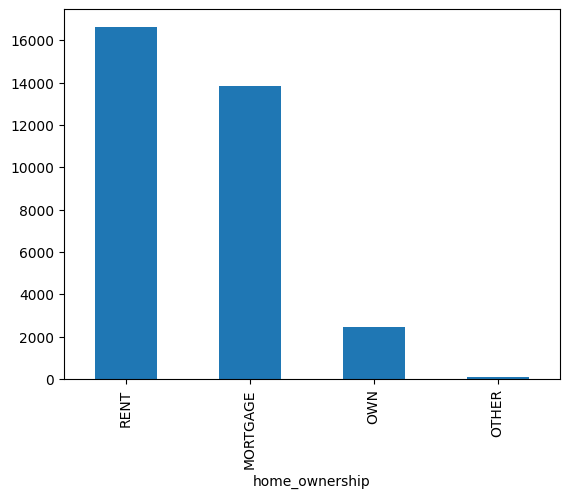

In [673]:
data['home_ownership'].value_counts().plot.bar()

## Insights

**Majority of the people are staying in rental Home or Mortagage**

<Axes: xlabel='purpose'>

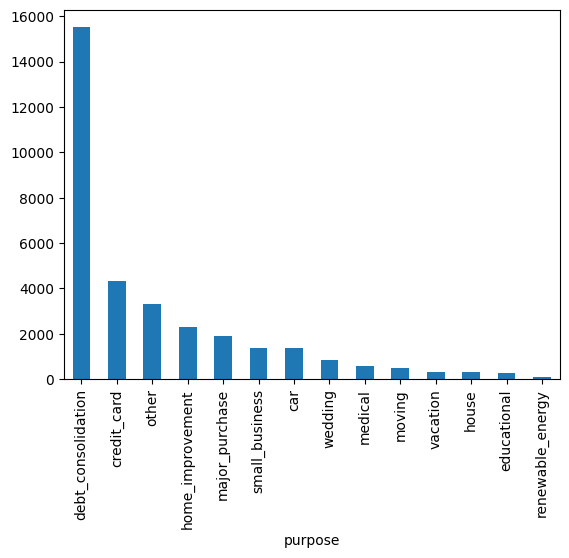

In [674]:
data['purpose'].value_counts().plot.bar()

## Insights

**Majority of loan application are in the category of debt_consolidation**

<Axes: xlabel='emp_length'>

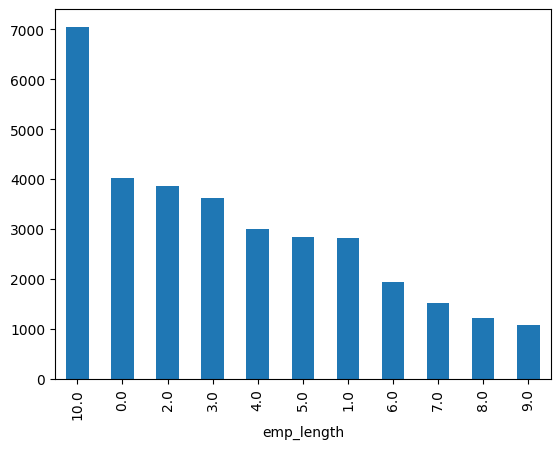

In [675]:
data['emp_length'].value_counts().plot.bar()

## Insights

**Majority of loan applicants were having 10+ years of experience**

<Axes: xlabel='issue_d_year'>

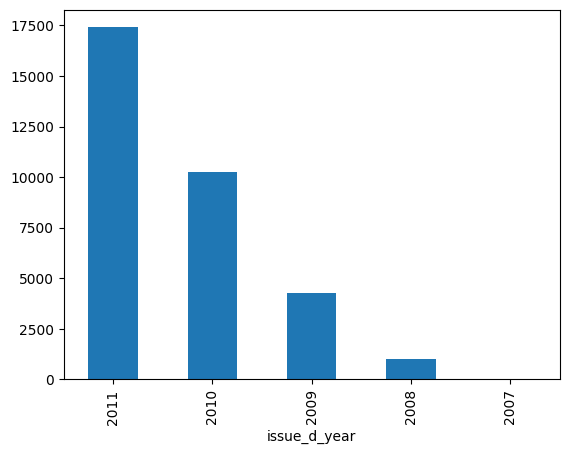

In [676]:
data['issue_d_year'].value_counts().plot.bar()

## Insights

**Majority of the loan application count is in the year 2011**

**It's increasing rapidly every year**

(32992, 31)

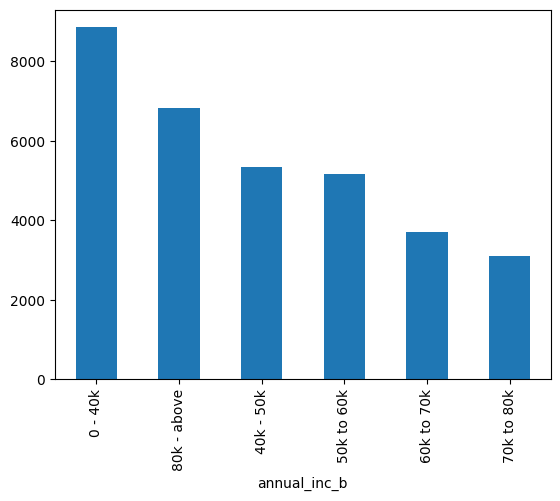

In [678]:
data['annual_inc_b'].value_counts().plot.bar()

data.shape

# Univarite Analysis Summary

### Customer Demographics
- Majority of the loan applicants are in the range of 0 - 40K annual income
- Majority of the home owner status are in status of RENT and MORTGAGE
- Highest loan applications are in the category of debt_consolidation
- Majority of the employment length of the customers are 10+ years and then in the range of 0-2 years

### Loan Demographics
- Highest loan amount applications fall in the range of 5k to 10k
- Majority of the interest rate is in the range of 5% to 16% going at the max to 22%
- Majority of the installment amount is in the range of 20$ to 400$
- Majority of the loan applications counts are in the term of 36 months
- Majority of loan application counts fall under the catogory of Grade B

### Time Based Analysis
- Loan application counts are increasing year over year.

### Inferences
- The customer demographic data shows which segment of customers to target for highest volume of loan
- Indicates more analysis is needed why other categories are not as high as other few
- Indicates the LendingClub to be prepared with volume in Q4
- Indicates the LendingClub to target customers in other quarters to increase sales

In [ ]:
# Printing column info to analyse missing values, empty values in a column
print(data.info())
data.head()
# Taking a data snapshot
data.to_csv('snapshot.loan.csv') 

## Bivariate Analysis

### Numerical vs Numerical

##### Loan Amount vs Interest Rate for Charged Off

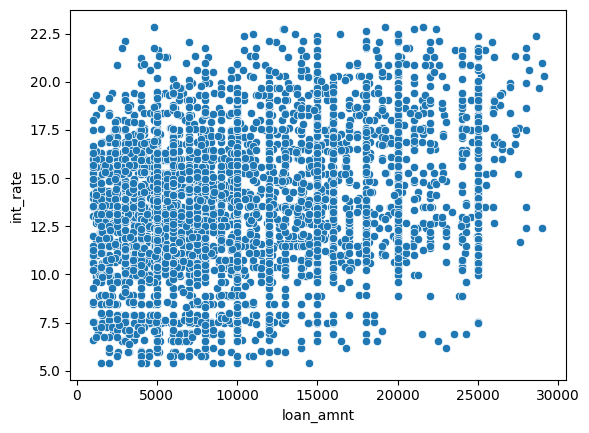

In [608]:
# This plot is used to check if two columns have positive/negative or no relationship
#
sns.scatterplot(x = charged_off_df["loan_amnt"], y = charged_off_df["int_rate"])
plt.show()

In [ ]:
# Removing duplicates
data = data.drop_duplicates()
print(data.head(50))

In [ ]:
# Exploratory Data Analysis (EDA)
# Univariate Analysis
# Analyzing the distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(data['loan_amnt'], bins=30, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Bivariate Analysis
# Analyzing the relationship between loan amount and loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=data)
plt.title('Loan Amount vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()